In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the generated dataset
data = pd.read_csv('/content/drive/MyDrive/GirlsScriptOpenSource/Mlrepo/Blood Glucose Level Prediction (Machine Learning)/blood_glucose_data.csv')


In [ ]:
# Convert timestamp to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Plotting the data
fig, axs = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# Plot glucose levels over time
axs[0].plot(data['timestamp'], data['glucose_level'], color='blue', label='Glucose Level')
axs[0].set_title('Glucose Levels Over Time')
axs[0].set_ylabel('Glucose Level (mg/dL)')
axs[0].legend()

# Plot insulin doses over time
axs[1].scatter(data['timestamp'], data['insulin_dose'], color='red', label='Insulin Dose', alpha=0.6)
axs[1].set_title('Insulin Doses Over Time')
axs[1].set_ylabel('Insulin Dose (units)')
axs[1].legend()

# Plot carbohydrate intake over time
axs[2].scatter(data['timestamp'], data['carb_intake'], color='green', label='Carbohydrate Intake', alpha=0.6)
axs[2].set_title('Carbohydrate Intake Over Time')
axs[2].set_ylabel('Carbohydrate Intake (grams)')
axs[2].legend()

# Format x-axis
axs[2].set_xlabel('Timestamp')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Mean Absolute Error: 15.434853864676704
Root Mean Squared Error: 19.203202708385763


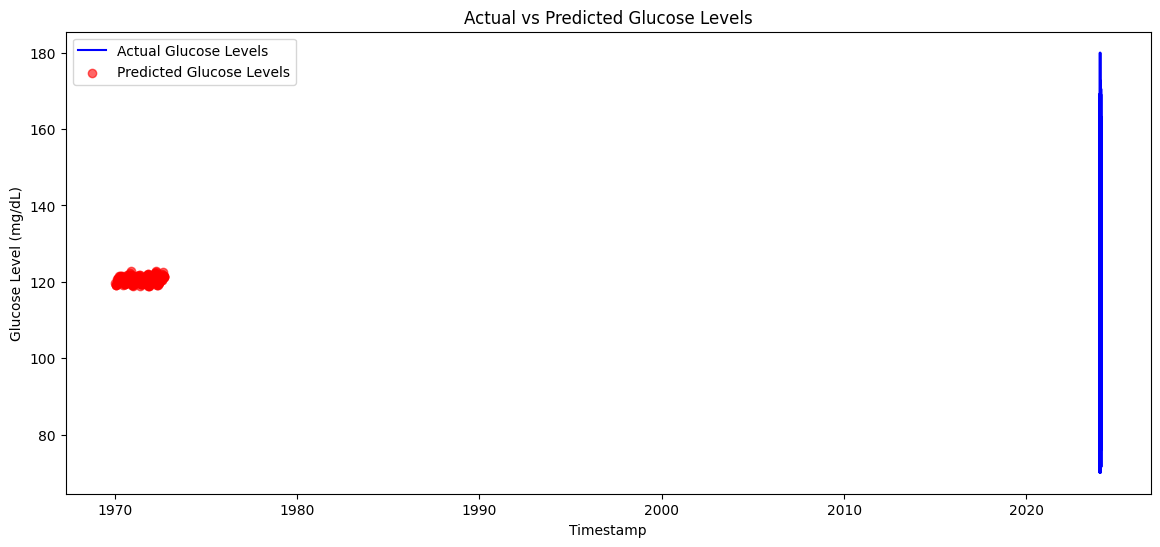

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Convert timestamp to datetime and extract features
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['hour'] = data['timestamp'].dt.hour
data['day_of_week'] = data['timestamp'].dt.dayofweek

# Define features and target
features = ['hour', 'day_of_week', 'insulin_dose', 'carb_intake']
target = 'glucose_level'

# Split the data
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

# Plot the results
plt.figure(figsize=(14, 6))
plt.plot(data['timestamp'], data['glucose_level'], label='Actual Glucose Levels', color='blue')
plt.scatter(X_test.index, predictions, label='Predicted Glucose Levels', color='red', alpha=0.6)
plt.title('Actual vs Predicted Glucose Levels')
plt.xlabel('Timestamp')
plt.ylabel('Glucose Level (mg/dL)')
plt.legend()
plt.show()
